# Imports

In [1]:
import pyxdf
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import wave
#import pyaudio
import numpy as np
import sounddevice as sd
import cv2

# Load Data

In [2]:
xdf_path = "C:/Users/Admin/Documents/CurrentStudy/sub-P005/ses-S001/mobi/sub-P005_ses-S001_task-Social_run-001_mobi.xdf"
#xdf_path = "C:/Users/Admin/Documents/CurrentStudy/sub-P666/ses-S001/mobi/sub-P666_ses-S001_task-Story_run-001_mobi.xdf"
#xdf_path = "C:/Users/Admin/Documents/CurrentStudy/sub-Pbryan/ses-S001/mic/sub-Pbryan_ses-S001_task-MicTest_run-001_mic.xdf"
data, header = pyxdf.load_xdf(xdf_path)
streams_collected = [stream['info']['name'][0] for stream in data]
streams_collected

Stream 2: Calculated effective sampling rate 119.9952 Hz is different from specified rate 90.0000 Hz.
Stream 6: Calculated effective sampling rate 249.9926 Hz is different from specified rate 500.0000 Hz.


['OpenSignals',
 'Tobii',
 'EGI NetAmp 0',
 'WebcamStream',
 'Stimuli_Markers',
 'Audio']

# Physio

In [3]:
PS = data[0]
# Get the column names
column_labels = [PS['info']['desc'][0]['channels'][0]['channel'][i]['label'][0] for i in range(len(PS['info']['desc'][0]['channels'][0]['channel']))]
ps_df = pd.DataFrame(data=PS['time_series'], columns=column_labels)
ps_df['time'] = PS['time_stamps'] - PS['time_stamps'][0]

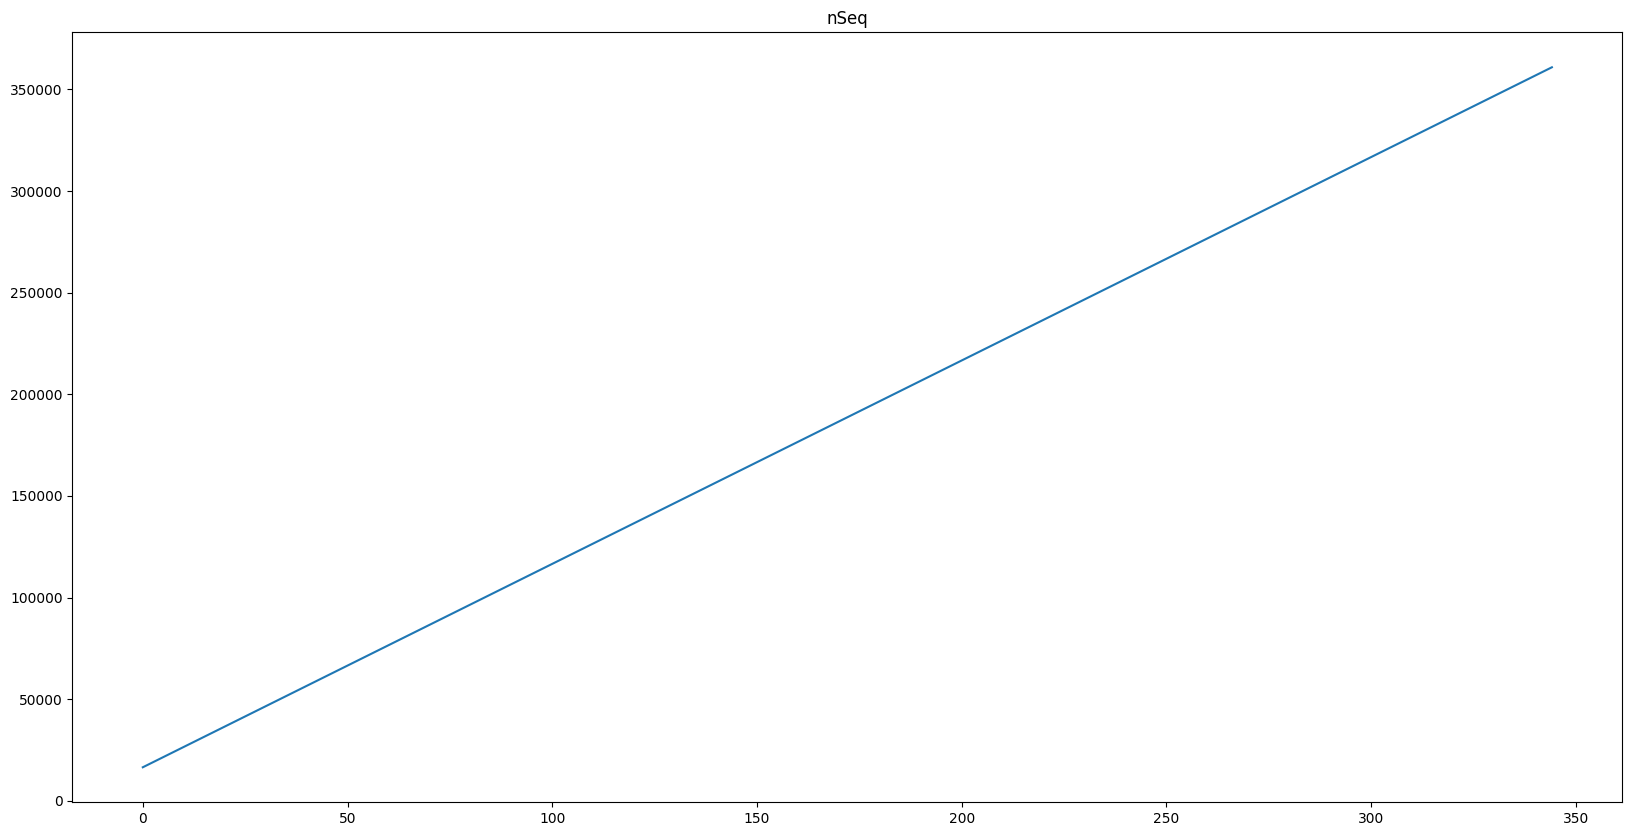

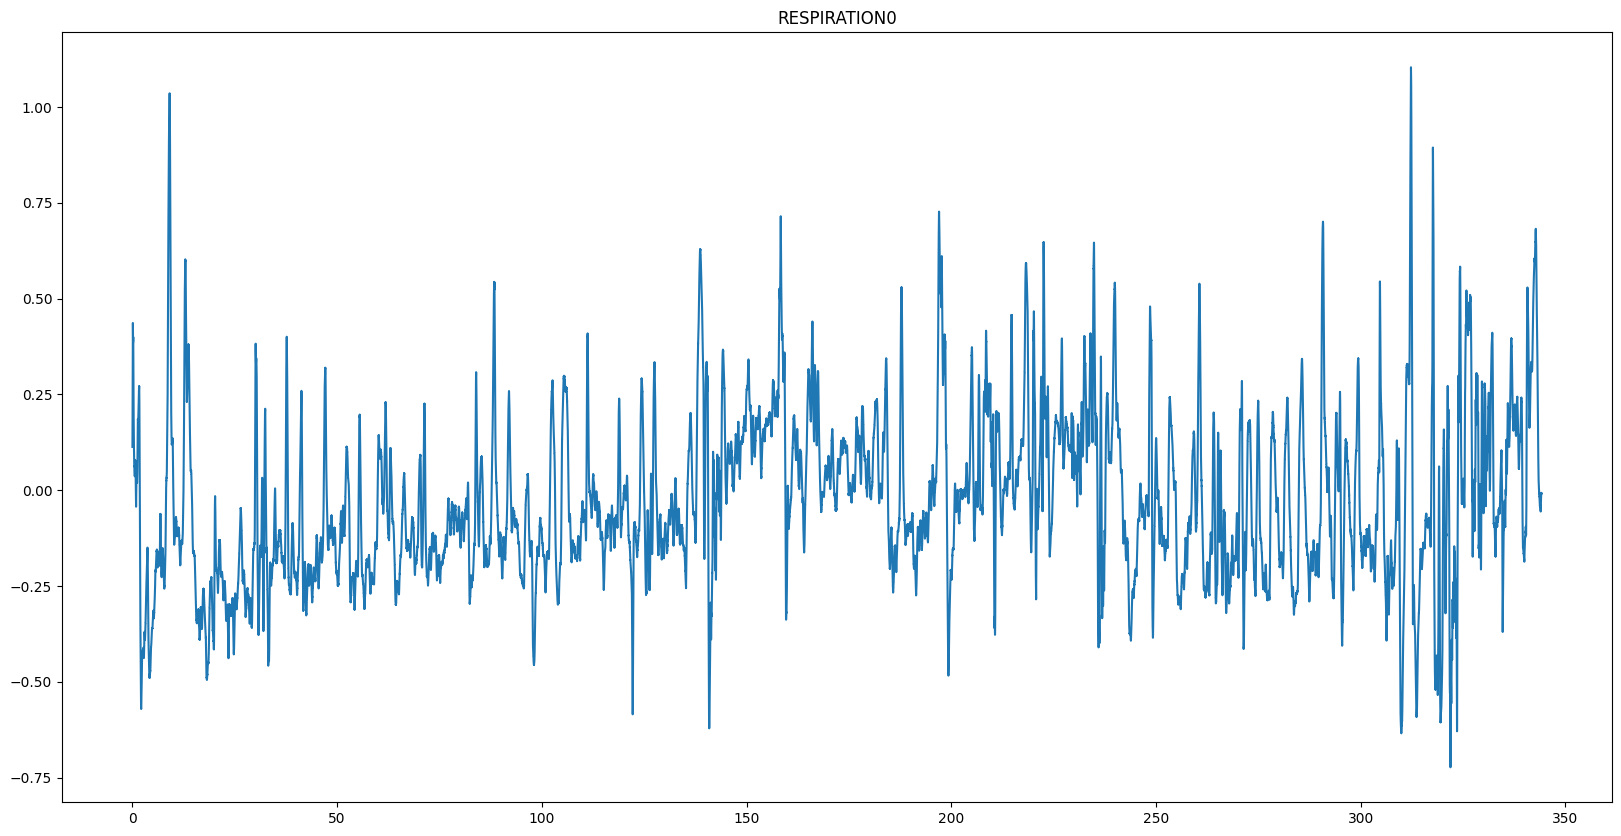

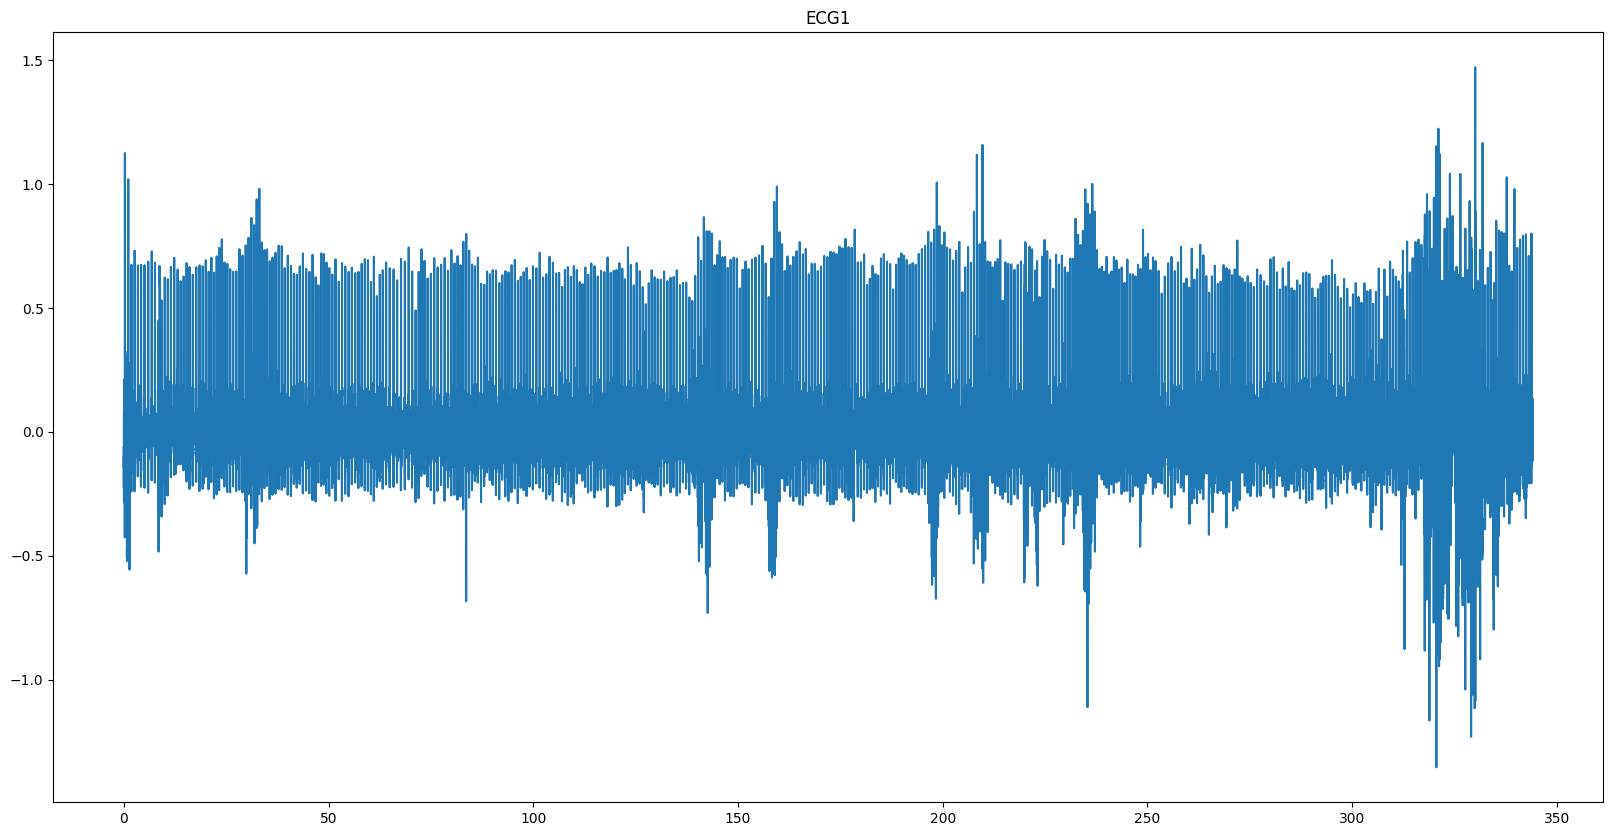

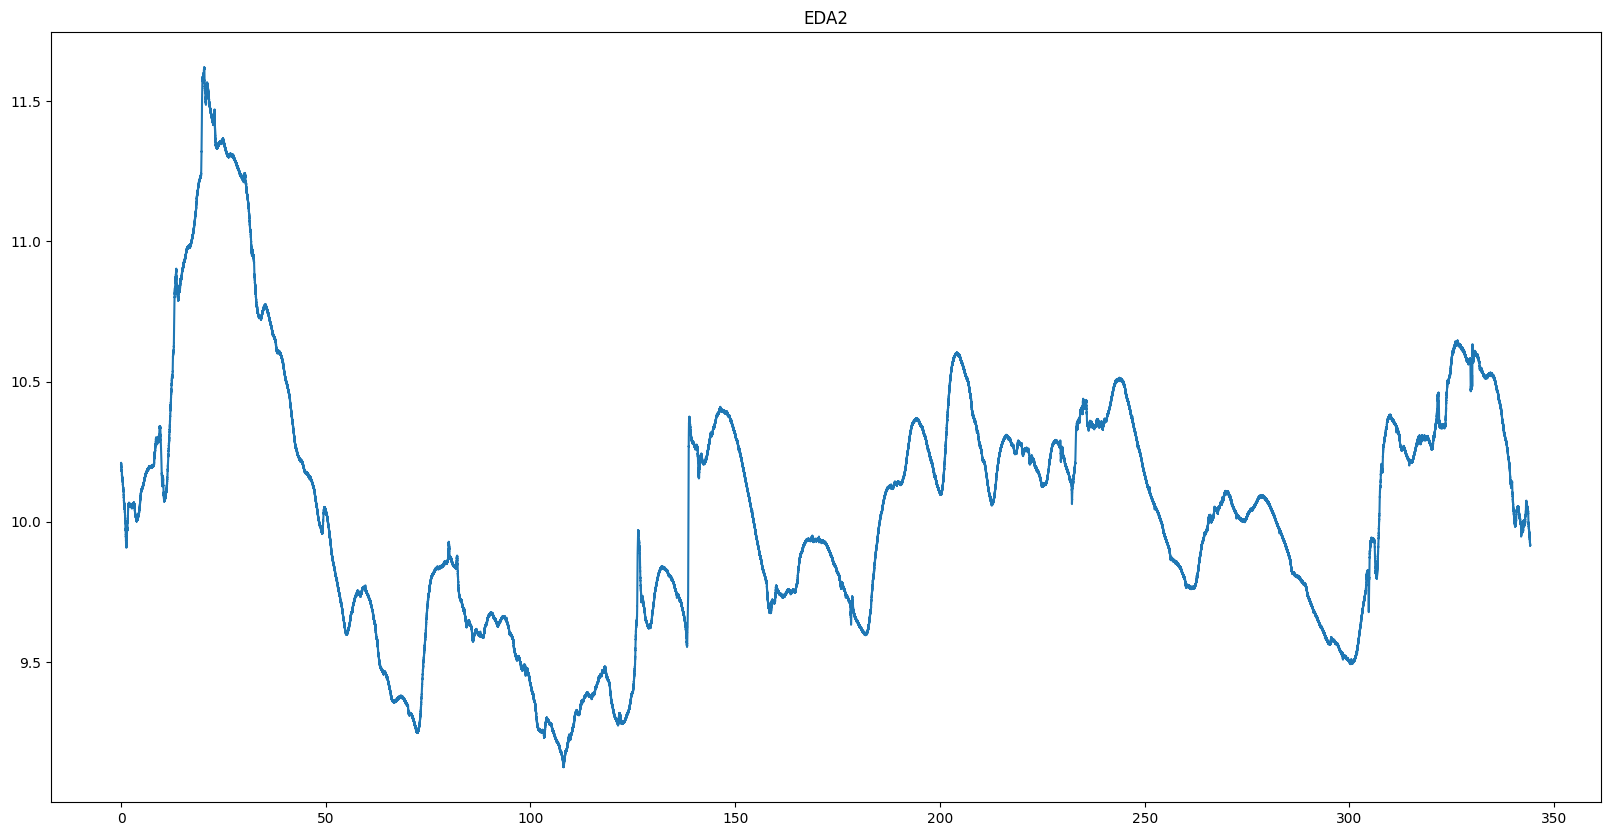

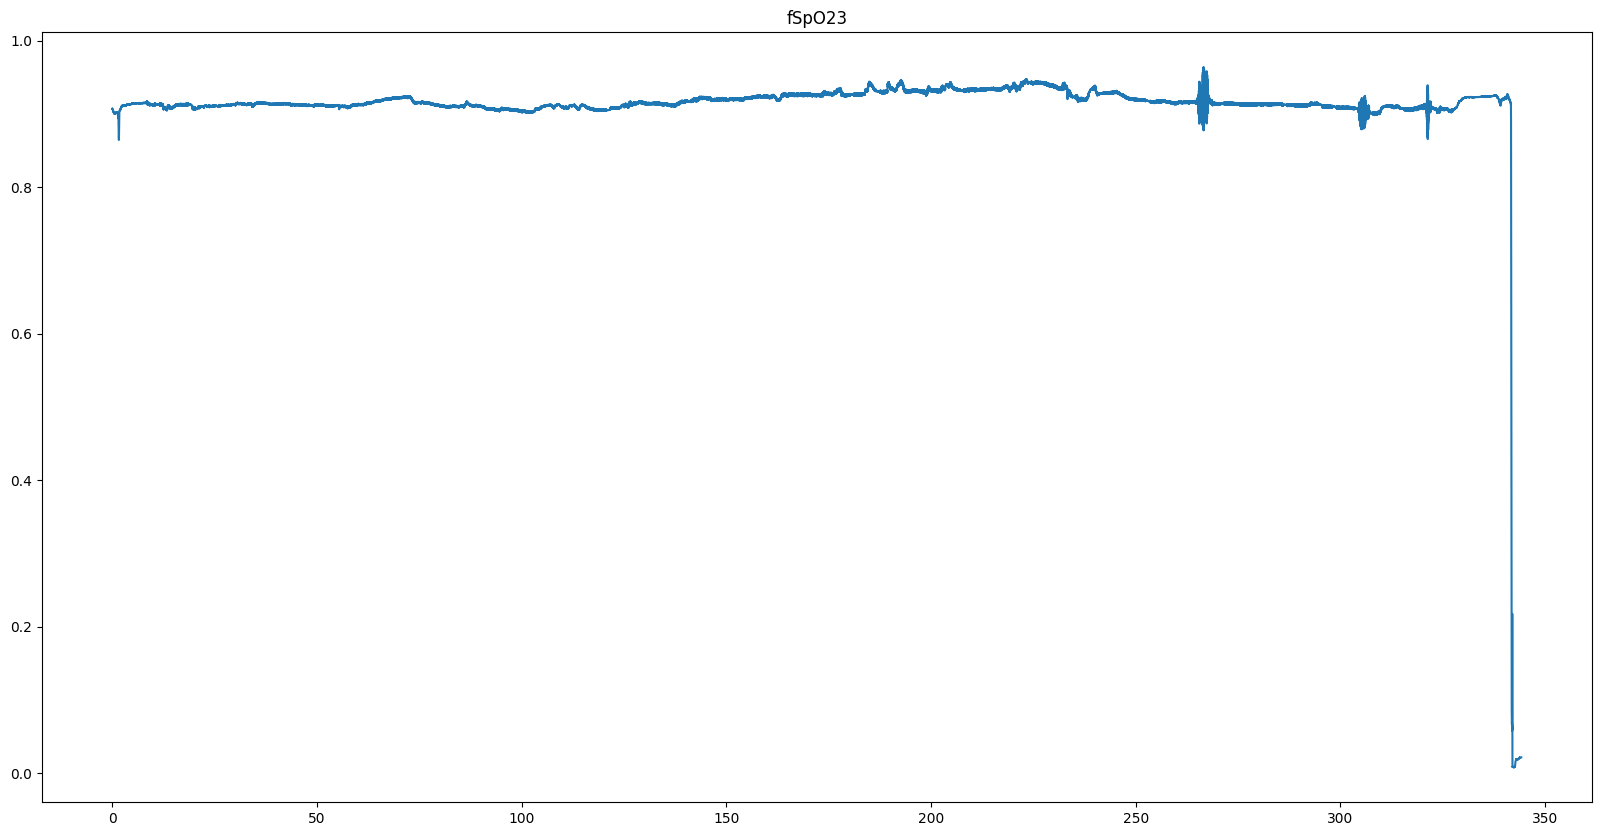

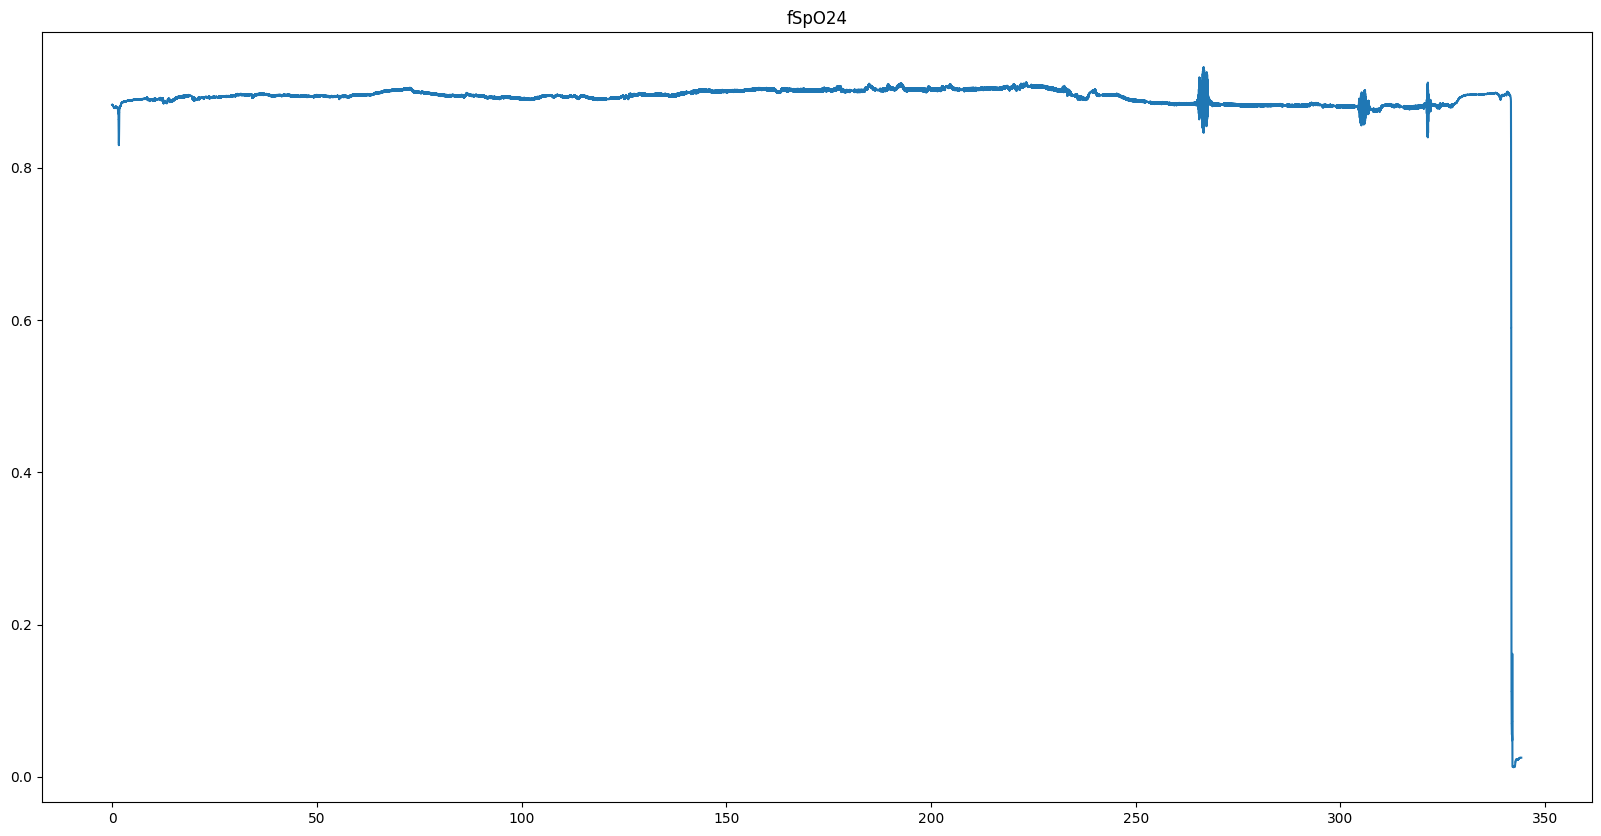

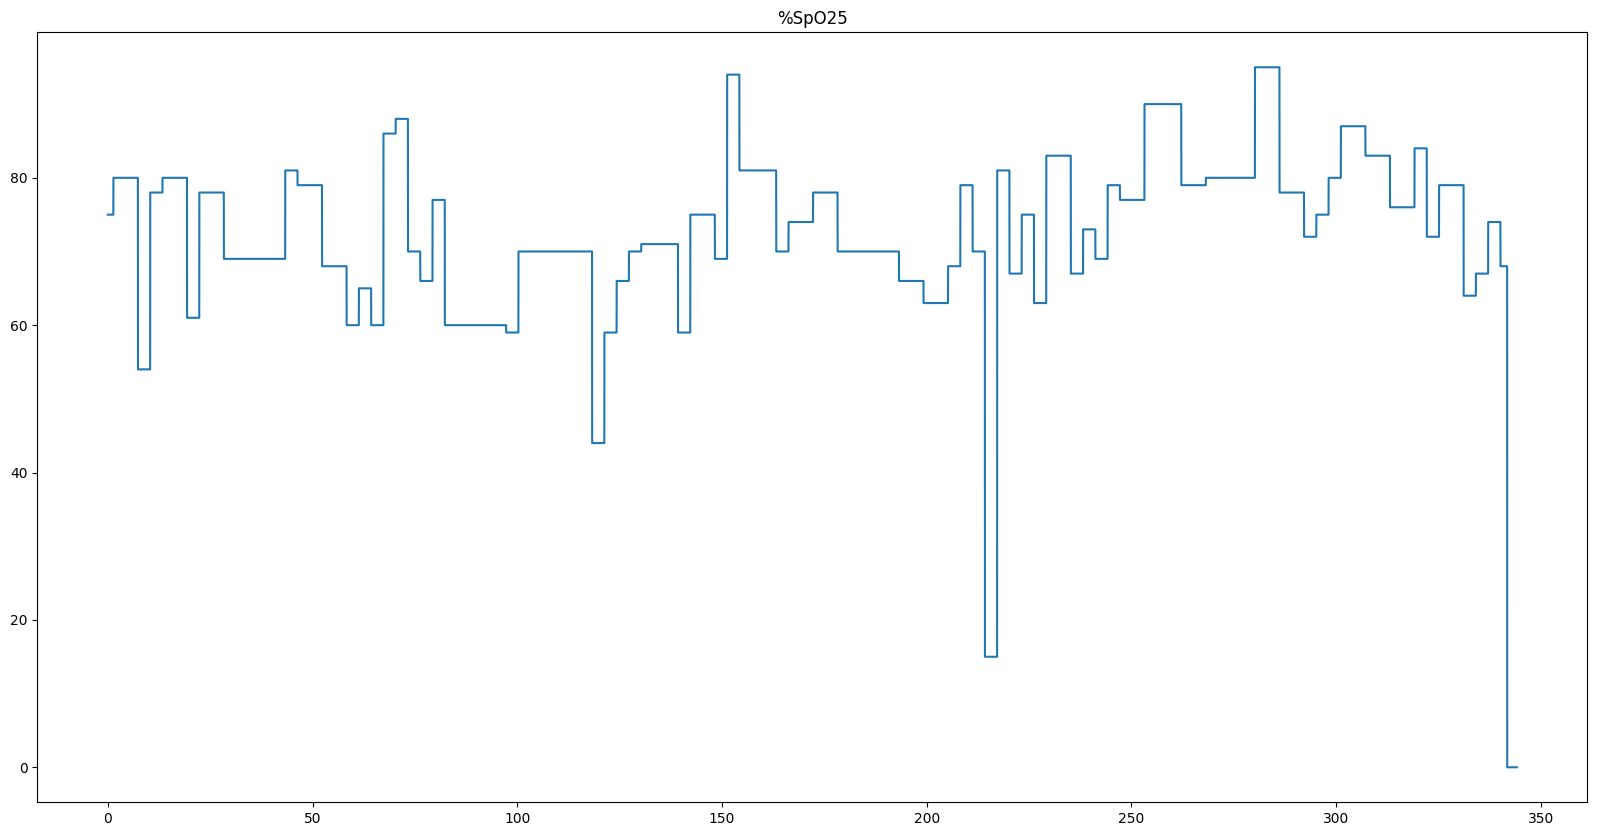

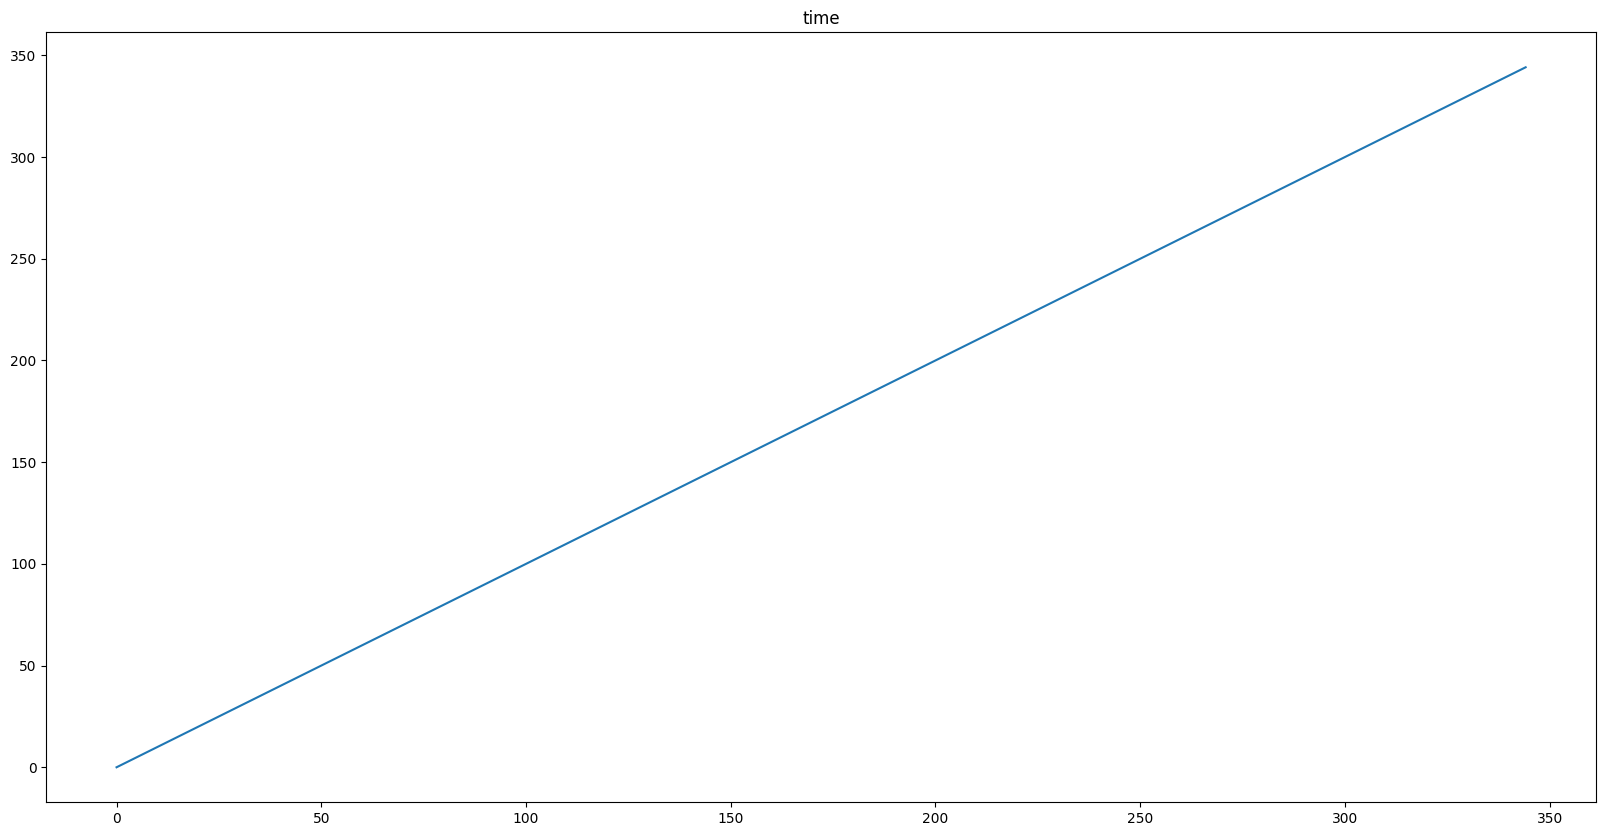

In [4]:
    
'''
# Plot every column in one plot
plt.figure(figsize=(20,10))
for col in ps_df.columns:
    plt.plot(ps_df['time'], ps_df[col])
plt.show()
'''
for col in ps_df.columns:
    plt.figure(figsize=(20,10))

    #plt.plot(ps_df.loc[(ps_df['time'] > 1000) & (ps_df['time'] < 1015), col])
    plt.plot(ps_df['time'], ps_df[col])
    plt.title(col)
    plt.show()

In [31]:
ps_df.time.max()/60


24.509770766849396

# Stimulus

## Stimulus Trigger Duration - Story Listening

In [6]:
stim_dat = data[0]
stim_df = pd.DataFrame(stim_dat['time_series'])
stim_df.rename(columns={0: 'trigger'}, inplace=True)
events = {
    100: 'Onset_10second_rest',
    101: 'Offset_10second_rest', 
    10: 'Onset_BirthMother',
    11: 'Offset_BirthMother', 
    20: 'Onset_CampFriend',
    21: 'Offset_CampFriend',
    30: 'Onset_FrogDissection',
    31: 'Offset_FrogDissection',
    40: 'Onset_DanceContest',
    41: 'Offset_DanceContest',
    50: 'Onset_ZoomClass',
    51: 'Offset_ZoomClass',
    60: 'Onset_Tornado',
    61: 'Offset_Tornado',
    70: 'Onset_BirthdayParty',
    71: 'Offset_BirthdayParty',
    80: 'Onset_Glitter',
    81: 'Offset_Glitter',
}

# relabel the event if the trigger is in the events dictionary, else if 
stim_df['event'] = stim_df['trigger'].apply(lambda x: events[x] if x in events.keys() else 'Bx_input')

# relabel the event as a psychopy timestamp if the trigger is greater than 4 digits
stim_df.loc[stim_df.trigger.astype(str).str.len() > 4, 'event'] = 'psychopy_time_stamp'
stim_df['lsl_time_stamps'] = stim_dat['time_stamps']
stim_df['time'] = stim_dat['time_stamps'] - stim_dat['time_stamps'][0]
stim_df.head(10)

,trigger,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,event,lsl_time_stamps,time
0,8253.093750,-2001.766602,7823.176758,7196.223145,4238.552246,310.002502,9876.593750,-329.035004,7676.767090,2818.882324,...,-369.617706,281.790863,-4267.122559,489.644043,-5223.354004,-497.437347,6984.215332,psychopy_time_stamp,253222.226147,0.000000
1,8253.337891,-1992.761353,7830.569824,7202.431641,4242.272949,311.848999,9878.348633,-321.492523,7682.994629,2820.904541,...,-372.605988,278.431915,-4271.540039,498.590332,-5200.248047,-462.330841,6996.797363,psychopy_time_stamp,253222.230147,0.004000
2,8240.950195,-1993.913696,7830.465332,7202.315430,4240.568359,310.869873,9876.615234,-322.998779,7673.650879,2820.572266,...,-371.231354,285.697449,-4263.309082,492.032593,-5215.053223,-499.989197,6979.814453,psychopy_time_stamp,253222.234147,0.008000
3,8252.758789,-1996.176147,7830.448730,7202.940430,4241.945801,311.763947,9873.786133,-321.089569,7670.322754,2817.015381,...,-367.612244,285.245453,-4262.273438,491.725250,-5215.043945,-504.640198,6981.665527,psychopy_time_stamp,253222.238148,0.012000
4,8249.060547,-1995.289551,7826.144531,7195.508301,4238.330566,308.299408,9872.178711,-321.876862,7660.422852,2809.155029,...,-367.167694,282.794220,-4264.742676,496.021759,-5190.920898,-492.955231,6988.713867,psychopy_time_stamp,253222.242148,0.016001
5,8245.981445,-2014.274292,7817.518555,7188.702148,4234.192871,303.384521,9871.612305,-324.161072,7636.215820,2806.824219,...,-372.816467,287.350861,-4265.325684,489.281464,-5222.303223,-521.289795,6969.809570,psychopy_time_stamp,253222.246148,0.020001
6,8248.696289,-2025.033569,7813.499023,7188.252441,4234.863770,306.666504,9873.331055,-340.814362,7647.368652,2806.090332,...,-370.346619,292.306122,-4266.594727,496.032318,-5221.114258,-504.940704,6981.755859,psychopy_time_stamp,253222.250148,0.024001
7,8269.023438,-2002.254639,7818.510254,7193.096680,4235.794434,308.192627,9875.785156,-327.330048,7673.437988,2810.906982,...,-370.391296,284.068268,-4267.225586,513.989441,-5189.515137,-511.867279,6962.401367,psychopy_time_stamp,253222.254148,0.028001
8,8238.484375,-1996.893311,7815.693848,7189.685547,4232.777832,305.072083,9875.492188,-322.064362,7670.455566,2805.868652,...,-375.278259,275.773895,-4275.648926,497.229980,-5184.338867,-515.765198,6954.502930,psychopy_time_stamp,253222.258148,0.032001
9,8223.020508,-2011.958984,7809.089844,7181.490723,4228.222656,303.861359,9873.112305,-348.127106,7651.437012,2795.368896,...,-384.120880,267.857056,-4279.640137,481.905396,-5247.419922,-518.010254,6966.327637,psychopy_time_stamp,253222.262148,0.036001


In [9]:
def get_secs_between_triggers(trigger1, trigger2):
    return stim_df.loc[stim_df.trigger == trigger1, 'time'].values[0] - stim_df.loc[stim_df.trigger == trigger2, 'time'].values[0]

# Get a list of the story names using the events dict
#story_names = [x.split('_')[1] for x in list(events.values())[2:][::2]]
#story_names

story_onsets = list(events.keys())[2:][::2] #every other trigger is the offset
story_onsets

[10, 20, 30, 40, 50, 60, 70, 80]

In [8]:
files= [
    "../audio_files/audio_files/After_Searching_I_Found_and_Met_My_Birth_Mother.wav",
    "../audio_files/audio_files/Camp_Lose_A_Friend.wav",
    "../audio_files/audio_files/Frog_Dissection_Disaster.wav",
    "../audio_files/audio_files/I_Decided_To_Be_Myself_And_Won_A_Dance_Contest.wav",
    "../audio_files/audio_files/I_Fully_Embarrassed_Myself_In_Zoom_Class1.wav",
    "../audio_files/audio_files/Left_Home_Alone_in_a_Tornado.wav",
    "../audio_files/audio_files/The_Birthday_Party_Prank.wav",
    "../audio_files/audio_files/My_Dad_Saw_Me_Wearing_Glitter_At_School.wav"
]


durations = pd.DataFrame({
    'trigger':story_onsets,
    'story':[events[x] for x in story_onsets],
    'lsl_duration': [get_secs_between_triggers(x+1, x) for x in story_onsets],
    'audiofile_duration': [wave.open(x).getnframes()/wave.open(x).getframerate() for x in files] #duration of audio file is number of frames divided by the frame rate.
})

durations['difference(sec)'] = durations['audiofile_duration'] - durations['lsl_duration']
durations

IndexError: index 0 is out of bounds for axis 0 with size 0

## Stimulus Triggers - Social Script

In [3]:
stim_dat = data[4]
stim_df = pd.DataFrame(stim_dat['time_series'])
stim_df.rename(columns={0: 'trigger'}, inplace=True)

events = {100: 'Conversation_start', 
          101: 'Conversation_end'}

# relabel the event if the trigger is in the events dictionary, else if 
stim_df['event'] = stim_df['trigger'].apply(lambda x: events[x] if x in events.keys() else 'Bx_input')

# relabel the event as a psychopy timestamp if the trigger is greater than 4 digits
stim_df.loc[stim_df.trigger.astype(str).str.len() > 4, 'event'] = 'psychopy_time_stamp'
stim_df['time'] = stim_dat['time_stamps'] #- stim_dat['time_stamps'][0]

conversation_onset_stim = stim_df.loc[stim_df.event == 'Conversation_start', 'time'].values[0]
conversation_offset_stim = stim_df.loc[stim_df.event == 'Conversation_end', 'time'].values[0]
stim_df


,trigger,event,time
0,100,Conversation_start,341598.449366
1,1722616294,psychopy_time_stamp,341598.449377
2,101,Conversation_end,341899.951128
3,1722616595,psychopy_time_stamp,341899.951139


# Linking Microphone Data to Video Data

In [4]:
mic_data = data[5]
mic_df = pd.DataFrame(mic_data['time_series'], columns=['int_array'])
mic_df['bytestring'] = mic_df['int_array'].apply(lambda x: np.array(x).tobytes())
mic_df['lsl_time_stamps'] = mic_data['time_stamps']
mic_df['time'] = mic_data['time_stamps'] #- mic_data['time_stamps'][0]
mic_df

,int_array,bytestring,lsl_time_stamps,time
0,-771,b'\xfd\xfc\xff\xff',341579.658152,341579.658152
1,-583,b'\xb9\xfd\xff\xff',341579.658174,341579.658174
2,-375,b'\x89\xfe\xff\xff',341579.658197,341579.658197
3,-154,b'f\xff\xff\xff',341579.658220,341579.658220
4,32,b' \x00\x00\x00',341579.658242,341579.658242
...,...,...,...,...
15174805,35,b'#\x00\x00\x00',341923.759080,341923.759080
15174806,-6,b'\xfa\xff\xff\xff',341923.759103,341923.759103
15174807,-4,b'\xfc\xff\xff\xff',341923.759125,341923.759125
15174808,18,b'\x12\x00\x00\x00',341923.759148,341923.759148


In [5]:

convo = mic_df.loc[(mic_df['time'] > conversation_onset_stim ) & (mic_df['time'] < conversation_offset_stim), 'int_array'].values



# Video Data
Now lets open the video frames

In [6]:
# Identify the frames we're interested in
cam_data = data[3]
#cam_df = pd.DataFrame(cam['time_series'], columns=['frame'])
#cam_df['lsl_timestamps'] = cam['time_stamps']
#cam_df['time'] = cam_df['lsl_timestamps'] - cam_df['lsl_timestamps'][0]
cam_data['time_series'][0]
frame_nums = [int(i[0]) for i in cam_data['time_series']]
time_pre = [float(i[1]) for i in cam_data['time_series']]
time_evnt_ms = [float(i[2]) for i in cam_data['time_series']]
time_post = [float(i[3]) for i in cam_data['time_series']]


cam_df = pd.DataFrame({'frame_num': frame_nums, 
                    'time_pre': time_pre, 
                    'cap_time_ms': time_evnt_ms,
                    'time_post': time_post,
                    'lsl_time_stamp': cam_data['time_stamps']})



cam_df['frame_time_sec'] = (cam_df.cap_time_ms - cam_df.cap_time_ms[0])/1000
cam_df['lsl_time_sec'] = cam_df.lsl_time_stamp #- cam_df.lsl_time_stamp[0]
cam_df

,frame_num,time_pre,cap_time_ms,time_post,lsl_time_stamp,frame_time_sec,lsl_time_sec
0,1,1.722616e+09,2.533753e+08,1.722616e+09,341592.619618,0.000000,341592.619618
1,2,1.722616e+09,2.533754e+08,1.722616e+09,341592.652952,0.033333,341592.652952
2,3,1.722616e+09,2.533754e+08,1.722616e+09,341592.686285,0.066667,341592.686285
3,4,1.722616e+09,2.533754e+08,1.722616e+09,341592.719619,0.100000,341592.719619
4,5,1.722616e+09,2.533755e+08,1.722616e+09,341592.752952,0.133333,341592.752952
...,...,...,...,...,...,...,...
9419,9420,1.722617e+09,2.536893e+08,1.722617e+09,341906.588479,313.966667,341906.588479
9420,9421,1.722617e+09,2.536893e+08,1.722617e+09,341906.621813,314.000000,341906.621813
9421,9422,1.722617e+09,2.536894e+08,1.722617e+09,341906.655146,314.033333,341906.655146
9422,9423,1.722617e+09,2.536894e+08,1.722617e+09,341906.688480,314.066667,341906.688480


In [7]:
vid_convo = cam_df.loc[(cam_df['lsl_time_sec'] > conversation_onset_stim ) & (cam_df['lsl_time_sec'] < conversation_offset_stim)]
vid_convo_frames = vid_convo['frame_num'].values

A goal here is to identify timestamps in the microphone data and their corresponding frames in the video data

In [9]:
# Use cv2 to read the video file and play the frames
cap = cv2.VideoCapture('C:/Users/Admin/Documents/code/MOBI2024/CUNY_FACIAL/video_files/5555_CUNY_Face_SocialScript.avi')
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# play the video
while(cap.isOpened()):
    sd.play(convo)
    ret, frame = cap.read()
    if ret == True:
        if cap.get(1) in vid_convo_frames:
            cv2.imshow('Frame', frame)
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        else:
            continue
    else:
        break


KeyboardInterrupt: 